In [1]:
# required imports
import pandas as pd
import requests
from PIL import Image

In [2]:
# see tutorial on how to use the Edamam Food and Grocery Database API with Python : 
# https://rapidapi.com/blog/edamam-food-and-grocery-database-api-with-python-php-ruby-javascript-examples/

# download the data from the API
url = "https://edamam-food-and-grocery-database.p.rapidapi.com/api/food-database/v2/parser"

querystring = {"ingr":"champagne"}

headers = {
    "X-RapidAPI-Key": "722434ac2bmsh98aec1f033708a5p1afa15jsnd51bbdb6176b", # user personal key for the API
    "X-RapidAPI-Host": "edamam-food-and-grocery-database.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
response = response.json()

response

{'text': 'champagne',
 'parsed': [{'food': {'foodId': 'food_a656mk2a5dmqb2adiamu6beihduu',
    'uri': 'http://www.edamam.com/ontologies/edamam.owl#Food_table_white_wine',
    'label': 'Champagne',
    'knownAs': 'dry white wine',
    'nutrients': {'ENERC_KCAL': 82.0,
     'PROCNT': 0.07,
     'FAT': 0.0,
     'CHOCDF': 2.6,
     'FIBTG': 0.0},
    'category': 'Generic foods',
    'categoryLabel': 'food',
    'image': 'https://www.edamam.com/food-img/a71/a718cf3c52add522128929f1f324d2ab.jpg'}}],
 'hints': [{'food': {'foodId': 'food_a656mk2a5dmqb2adiamu6beihduu',
    'uri': 'http://www.edamam.com/ontologies/edamam.owl#Food_table_white_wine',
    'label': 'Champagne',
    'knownAs': 'dry white wine',
    'nutrients': {'ENERC_KCAL': 82.0,
     'PROCNT': 0.07,
     'FAT': 0.0,
     'CHOCDF': 2.6,
     'FIBTG': 0.0},
    'category': 'Generic foods',
    'categoryLabel': 'food',
    'image': 'https://www.edamam.com/food-img/a71/a718cf3c52add522128929f1f324d2ab.jpg'},
   'measures': [{'uri': '

In [3]:
# data selection — keeping only the following fields : foodId, label, category, foodContentsLabel, image, 
# for the 10 first products.

data = pd.DataFrame(response['hints'])[:10]

data_dict = {
    "foodId": [],
    "label": [],
    "category" : [],
    "foodContentsLabel" : [],
    "image" : []
}

for i in range(10):
    for key, value in data_dict.items():
        try: data_dict[key].append(data['food'][i][key])
        except: data_dict[key].append(None)

df = pd.DataFrame(data_dict)

df

,foodId,label,category,foodContentsLabel,image
0,food_a656mk2a5dmqb2adiamu6beihduu,Champagne,Generic foods,None,https://www.edamam.com/food-img/a71/a718cf3c52...
1,food_b753ithamdb8psbt0w2k9aquo06c,"Champagne Vinaigrette, Champagne",Packaged foods,OLIVE OIL; BALSAMIC VINEGAR; CHAMPAGNE VINEGAR...,None
2,food_b3dyababjo54xobm6r8jzbghjgqe,"Champagne Vinaigrette, Champagne",Packaged foods,INGREDIENTS: WATER; CANOLA OIL; CHAMPAGNE VINE...,https://www.edamam.com/food-img/d88/d88b64d973...
3,food_a9e0ghsamvoc45bwa2ybsa3gken9,"Champagne Vinaigrette, Champagne",Packaged foods,CANOLA AND SOYBEAN OIL; WHITE WINE (CONTAINS S...,None
4,food_an4jjueaucpus2a3u1ni8auhe7q9,"Champagne Vinaigrette, Champagne",Packaged foods,WATER; CANOLA AND SOYBEAN OIL; WHITE WINE (CON...,None
5,food_bmu5dmkazwuvpaa5prh1daa8jxs0,"Champagne Dressing, Champagne",Packaged foods,SOYBEAN OIL; WHITE WINE (PRESERVED WITH SULFIT...,https://www.edamam.com/food-img/ab2/ab2459fc2a...
6,food_alpl44taoyv11ra0lic1qa8xculi,Champagne Buttercream,Generic meals,sugar; butter; shortening; vanilla; champagne;...,None
7,food_byap67hab6evc3a0f9w1oag3s0qf,Champagne Sorbet,Generic meals,Sugar; Lemon juice; brandy; Champagne; Peach,None
8,food_am5egz6aq3fpjlaf8xpkdbc2asis,Champagne Truffles,Generic meals,butter; cocoa; sweetened condensed milk; vanil...,None
9,food_bcz8rhiajk1fuva0vkfmeakbouc0,Champagne Vinaigrette,Generic meals,champagne vinegar; olive oil; Dijon mustard; s...,None


In [4]:
# save the data in a .csv file
df.to_csv('Minier_Antoine_7_data_from_API_062023/first_10_champagne_products.csv')

# download the images and save them
n = 0
for img_url in df['image']:
    try: 
        image_content = requests.get(img_url).content
        with open(f'Minier_Antoine_7_data_from_API_062023/image{n}.jpg', 'wb') as f:
            f.write(image_content)
    except: 
        pass
    finally: 
        n+=1

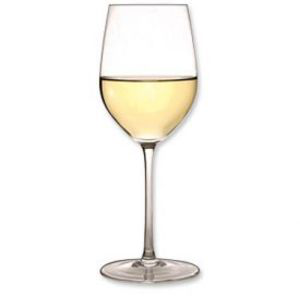

In [5]:
# display an image
Image.open('image0.jpg')